# 1. Data Processing

## 1.1. Read Data

In [13]:
rm(list =ls())
library(MASS)

data = read.csv("BodyFat.csv")
data = data[c(-1,-3)] # Remove indexes and density
head(data)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [14]:
summary(data)

    BODYFAT           AGE            WEIGHT          HEIGHT     
 Min.   : 0.00   Min.   :22.00   Min.   :118.5   Min.   :29.50  
 1st Qu.:12.80   1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25  
 Median :19.00   Median :43.00   Median :176.5   Median :70.00  
 Mean   :18.94   Mean   :44.88   Mean   :178.9   Mean   :70.15  
 3rd Qu.:24.60   3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25  
 Max.   :45.10   Max.   :81.00   Max.   :363.1   Max.   :77.75  
   ADIPOSITY          NECK           CHEST           ABDOMEN      
 Min.   :18.10   Min.   :31.10   Min.   : 79.30   Min.   : 69.40  
 1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35   1st Qu.: 84.58  
 Median :25.05   Median :38.00   Median : 99.65   Median : 90.95  
 Mean   :25.44   Mean   :37.99   Mean   :100.82   Mean   : 92.56  
 3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38   3rd Qu.: 99.33  
 Max.   :48.90   Max.   :51.20   Max.   :136.20   Max.   :148.10  
      HIP            THIGH            KNEE           ANKLE          BICEPS  

In [15]:
RMIndex = which(data[,1]==0 | data[,3]==max(data[,3]) | data[,4]==min(data[,4]) | data[,6]==max(data[,6]) | data[,7]>125 | 
                data[,8]==max(data[,8]) | data[,9]>120 | data[,10]==max(data[,10]) | data[,11]==max(data[,11]) | 
                data[,11]==max(data[,11]) | data[,12]>29 | data[,13]==max(data[,13]))

In [16]:
data[RMIndex,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
31,12.3,32,182.00,73.75,23.6,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,33.1,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,31.7,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
182,0.0,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [17]:
data[42, ]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,31.7,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [18]:
# 1kg = 0.4535922921969lbs
# test 
weight1 <- 154.25 * 0.4535922921969
height1 <- 67.75 * 0.0254
bmi <- weight1 / height1^2

weight42 <- 205 * 0.4535922921969
height42 <- sqrt(weight42 / 29.9) 
data[42, 4] <- height42 / 0.0254 
data[42, 4]

[1] 69.42893

In [35]:
set <- c(31, 39, 41, 86, 182) 
#data <- data[-set, ]
RMIndex = c(set,216)
RMIndex

[1]  31  39  41  86 182 216

In [47]:
dim(data)

[1] 252  15

In [21]:
colnames(data)

[1] "BODYFAT"   "AGE"       "WEIGHT"    "HEIGHT"    "ADIPOSITY" "NECK"     
 [7] "CHEST"     "ABDOMEN"   "HIP"       "THIGH"     "KNEE"      "ANKLE"    
[13] "BICEPS"    "FOREARM"   "WRIST"

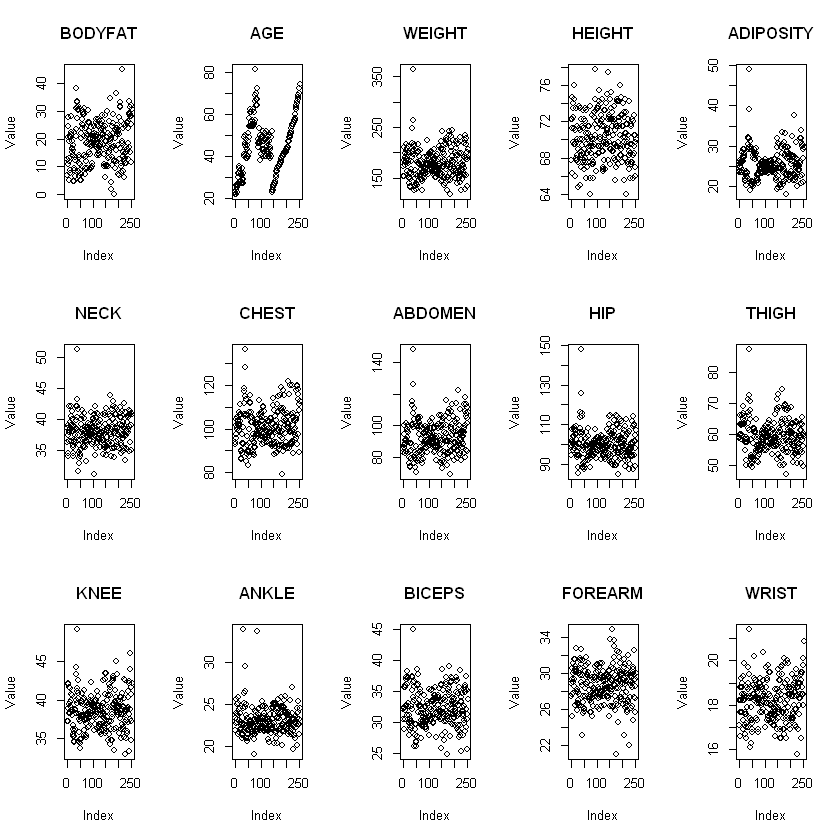

In [23]:
par(mfrow = c(3,5))
for(i in 1:15){
    plot(data[,i], main = colnames(data)[i], ylab = "Value")
}
par(mfrow = c(1,1))

## 1.2. Simple Linear Regression

In [48]:
lm.naive = lm(BODYFAT~., data = data[-RMIndex,])
summary(lm.naive)


Call:
lm(formula = BODYFAT ~ ., data = data[-RMIndex, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6498 -2.8212 -0.0284  2.6360  9.1439 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.40562   38.42686  -0.427  0.66983    
AGE           0.06034    0.03022   1.997  0.04703 *  
WEIGHT       -0.06554    0.10712  -0.612  0.54126    
HEIGHT        0.09855    0.53087   0.186  0.85289    
ADIPOSITY     0.48342    0.77624   0.623  0.53405    
NECK         -0.38189    0.21993  -1.736  0.08383 .  
CHEST        -0.12945    0.10449  -1.239  0.21665    
ABDOMEN       0.81526    0.08642   9.434  < 2e-16 ***
HIP          -0.15242    0.13951  -1.093  0.27574    
THIGH         0.18980    0.13895   1.366  0.17327    
KNEE         -0.04911    0.24981  -0.197  0.84432    
ANKLE        -0.06649    0.33893  -0.196  0.84465    
BICEPS        0.11602    0.16134   0.719  0.47278    
FOREARM       0.25556    0.19391   1.318  0.18882    
WRIST        -1.44796  

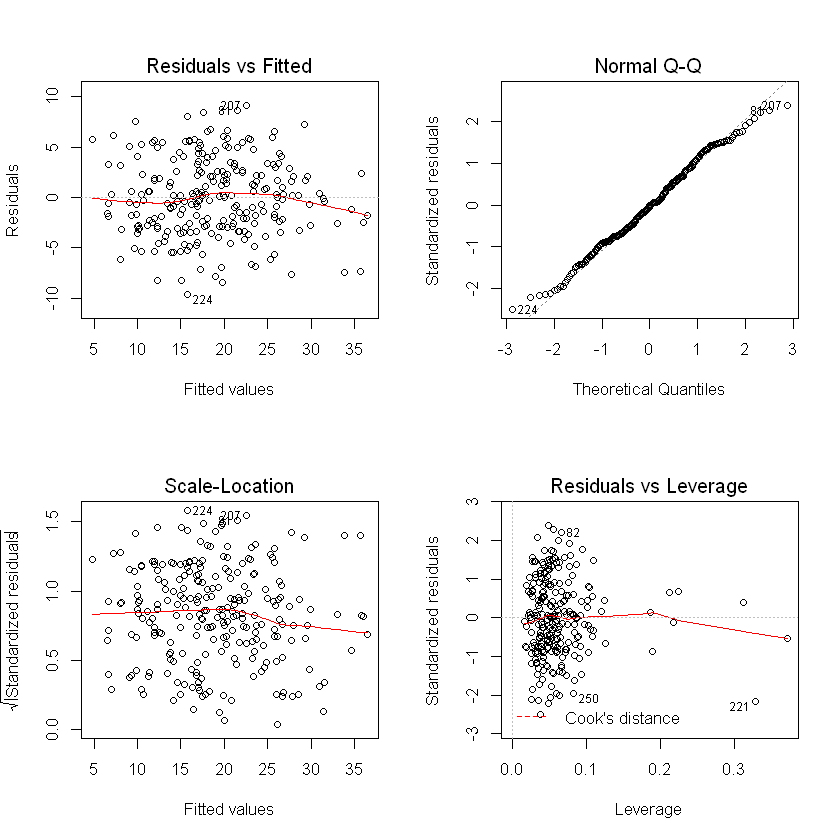

In [49]:
par(mfrow = c(2,2))
plot(lm.naive)
par(mfrow = c(1,1))

## 1.3. Identify Outliers And Strong Influential Points

### 1.3.1. Studentized Residual

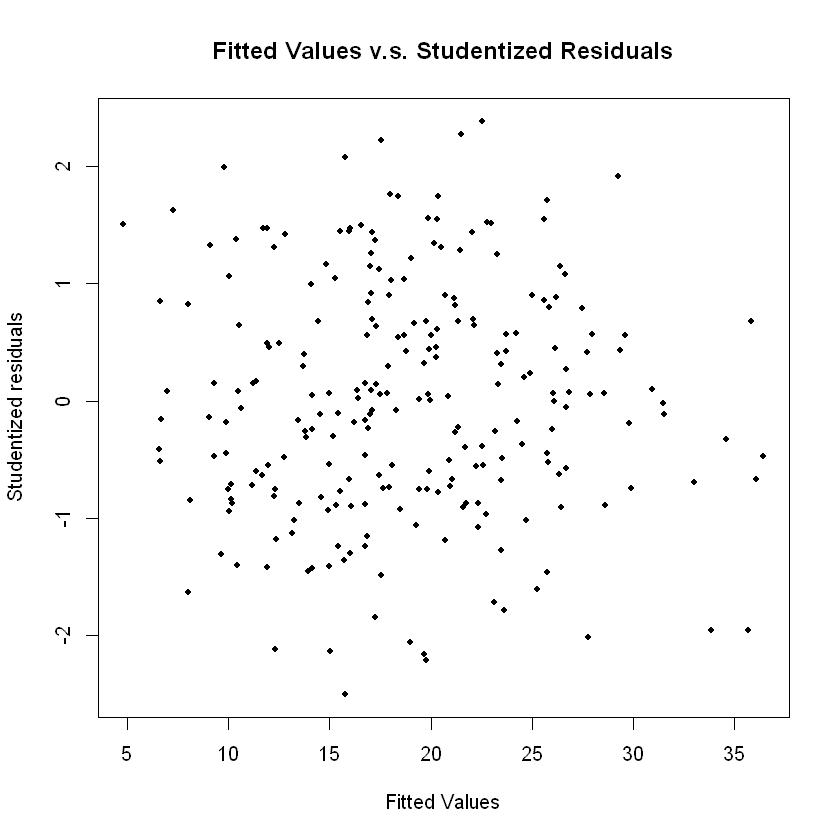

In [50]:
index = 1:dim(data)[1]
lm.stdres = stdres(lm.naive)
plot(x = lm.naive$fitted.values, y = lm.stdres, ylab = "Studentized residuals", xlab = "Fitted Values", 
     main = "Fitted Values v.s. Studentized Residuals", pch = 20)
#text(y = lm.stdres[which(abs(lm.stdres)>3)], x = lm.naive$fitted.values[which(abs(lm.stdres)>3)], 
#     labels = index[which(abs(lm.stdres)>3)], cex = 1, pos = 3)

### 1.3.2. Leverage Value

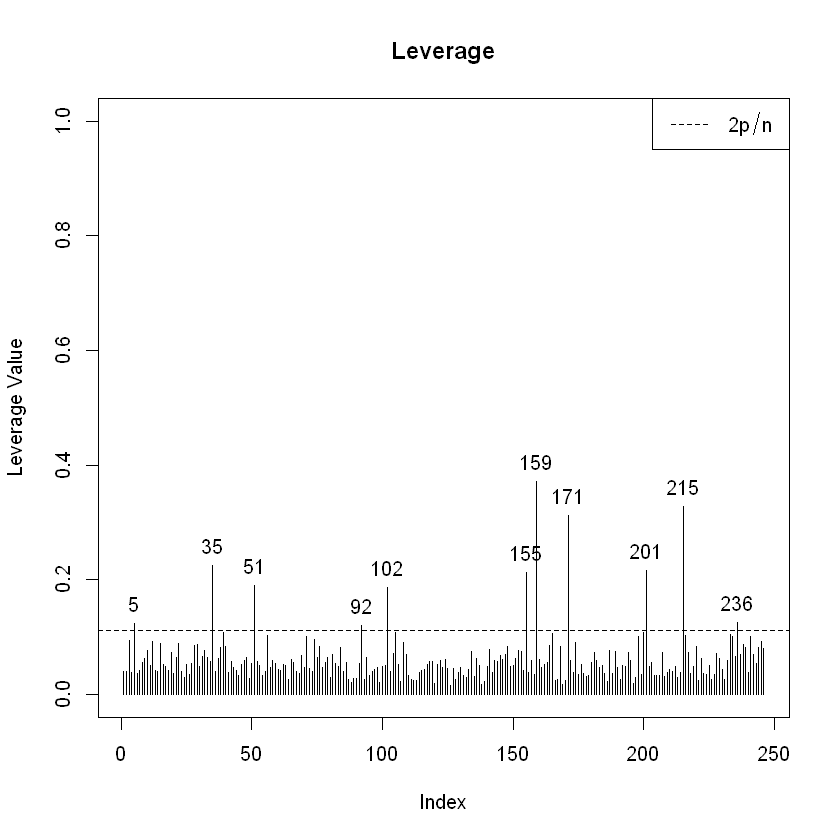

In [51]:
lm.hats=hatvalues(lm.naive)
plot(lm.hats, type = "h", ylim = c(0, 1), ylab = "Leverage Value", main = "Leverage") 
h0 = 28/252 # Rule of thumb for judging outliers
text(y = lm.hats[lm.hats>h0], x = which(lm.hats>h0), labels = which(lm.hats>h0), cex = 1, pos = 3)
abline(h = h0, lty = 2)
legend("topright", legend = expression(2*p/n), lty = 2)

### 1.3.3. DFFITS

In [68]:
dffit_index = as.numeric(names(lm.dffits))
dffit_index

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37
 [37]  38  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
 [55]  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
 [73]  76  77  78  79  80  81  82  83  84  85  87  88  89  90  91  92  93  94
 [91]  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
[109] 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
[127] 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
[145] 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
[163] 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 183 184 185
[181] 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
[199] 204 205 206 207 208 209 210 211 212 213 214 215 217 218 219 220 221 222
[217] 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
[235] 241 242 243 244 245 246 247 248 249 250 251 252

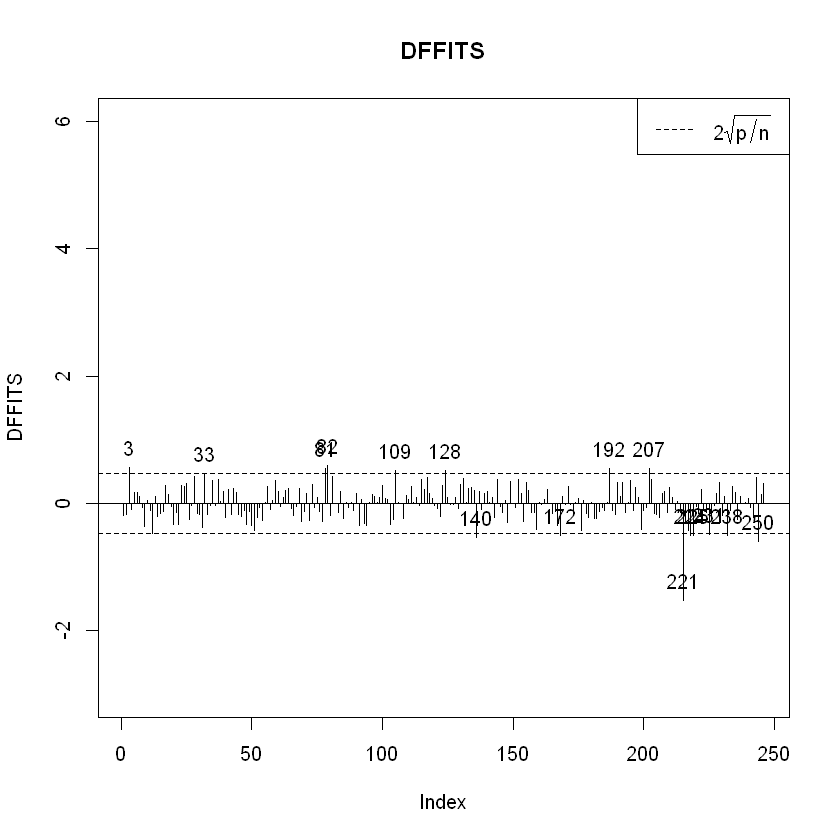

In [69]:
lm.dffits = dffits(lm.naive)
plot(lm.dffits, type = "h", ylim = c(-3, 6), ylab = "DFFITS", main = "DFFITS")
d0 = 2*sqrt(14/252) # Rule of thumb for judging influential points
text(y = lm.dffits[abs(lm.dffits)>d0], x = which(abs(lm.dffits)>d0), labels = dffit_index[which(abs(lm.dffits)>d0)], cex = 1, pos = 3)
abline(h = c(-1*d0, 0, d0), lty = c(2,1,2))
legend("topright", legend = expression(2*sqrt(p/n)), lty = 2)

### 1.3.4. Cook's Distance

ERROR: Error in text.default(y = lm.cooksD[lm.cooksD > c0], x = which(lm.cooksD > : zero-length 'labels' specified


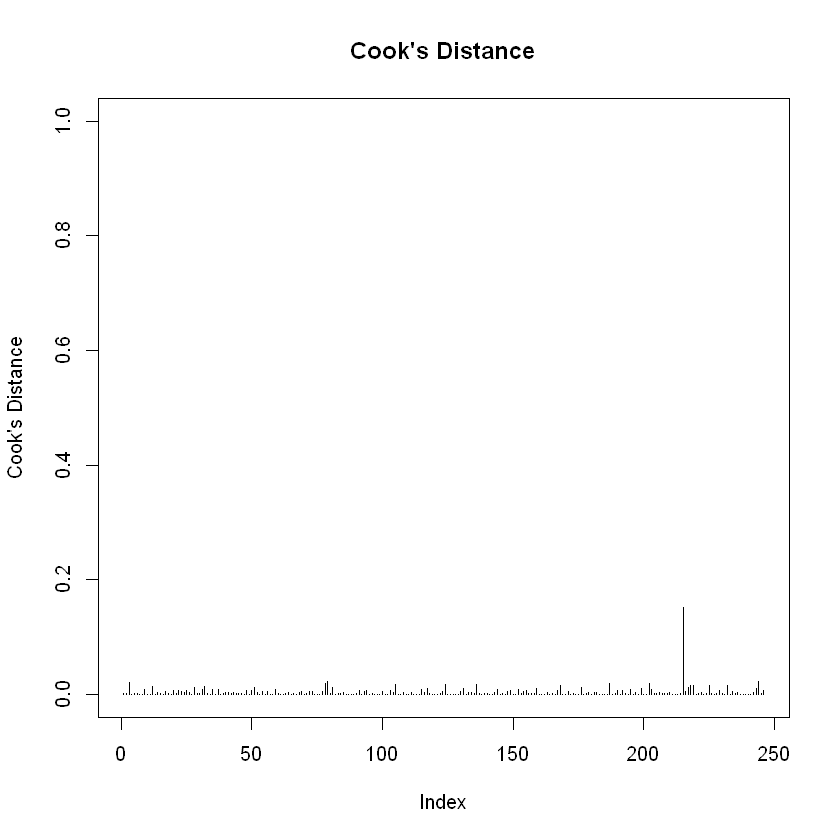

In [70]:
lm.cooksD=cooks.distance(lm.naive)
plot(lm.cooksD, type = "h", ylim = c(0, 1), ylab = "Cook's Distance", main = "Cook's Distance")
c0 = qf(0.5, 14, 238)
text(y = lm.cooksD[lm.cooksD>c0], x = which(lm.cooksD>c0), labels = dffit_index[which(lm.cooksD>c0)], cex = 1, pos = 3)
abline(h = c0, lty = 2)
legend("topright", legend = expression(F[paste("p,n-p", sep="")]), lty = 2)

In [74]:
data[which(lm.hats>h0 & abs(lm.dffits)>d0),]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
210,11.3,47,159.75,70.75,22.5,34.5,92.9,84.4,94.0,56.0,38.2,22.6,29.0,26.2,17.6
215,19.3,50,172.75,73.00,22.8,37.4,98.7,87.6,96.1,57.1,38.1,21.8,28.6,26.7,18.0


These Points have both large leverage value and DFFITS.

In [67]:
step(lm.naive, direction = "backward")

Start:  AIC=688.07
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.32 3570.6 686.09
- KNEE       1      2.53 3572.8 686.24
- HEIGHT     1      2.97 3573.3 686.27
- BICEPS     1      7.88 3578.2 686.61
- WEIGHT     1     10.56 3580.8 686.79
- ADIPOSITY  1     14.70 3585.0 687.08
- HIP        1     18.89 3589.2 687.36
- THIGH      1     22.55 3592.8 687.62
- FOREARM    1     23.80 3594.1 687.70
<none>                   3570.3 688.07
- CHEST      1     29.26 3599.5 688.07
- NECK       1     43.24 3613.5 689.03
- AGE        1     54.95 3625.2 689.82
- WRIST      1    115.09 3685.4 693.87
- ABDOMEN    1   1378.02 4948.3 766.36

Step:  AIC=686.09
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- HEIGHT     1      2.82 3573.4 684.28
-


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + 
    HIP + FOREARM + WRIST, data = data[-RMIndex, ])

Coefficients:
(Intercept)          AGE    ADIPOSITY         NECK        CHEST      ABDOMEN  
    3.27219      0.05378      0.59209     -0.36766     -0.20854      0.79711  
        HIP      FOREARM        WRIST  
   -0.17533      0.25567     -1.66325  


In [87]:
lm.step = lm(BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + FOREARM + WRIST, data = data[-RMIndex, ])
data.mod = lm.step$model
head(data.mod)

BODYFAT,AGE,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,FOREARM,WRIST
12.6,23,23.7,36.2,93.1,85.2,94.5,27.4,17.1
6.9,22,23.4,38.5,93.6,83.0,98.7,28.9,18.2
24.6,22,24.7,34.0,95.8,87.9,99.2,25.2,16.6
10.9,26,24.9,37.4,101.8,86.4,101.2,29.4,18.2
27.8,24,25.6,34.4,97.3,100.0,101.9,27.7,17.7
20.6,24,26.5,39.0,104.5,94.4,107.8,30.6,18.8


In [107]:
results = matrix(rep(0, 28*3), ncol = 3, nrow = 28)
colnames(results) = c("V1", "V2", "R^2")
k = 1
for(i in 2:8){
    s = i+1
    for(j in s:9){
        results[k, c(1,2)] = colnames(data.mod)[c(i,j)]
        results[k, 3] = round(summary(lm(BODYFAT~., data = data.mod[,c(1,i,j)]))$r.squared, 3)
        k = k+1
    }
}
results

V1,V2,R^2
AGE,ADIPOSITY,0.587
AGE,NECK,0.281
AGE,CHEST,0.504
AGE,ABDOMEN,0.683
AGE,HIP,0.496
AGE,FOREARM,0.222
AGE,WRIST,0.148
ADIPOSITY,NECK,0.562
ADIPOSITY,CHEST,0.551
ADIPOSITY,ABDOMEN,0.676


In [ ]:
##------------------------ scatterplot matrix
require(SciViews)
library("KernSmooth") 
### box and regression line
panel.box <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[3:4],0, 2 ))
  #par(usr = c(min(x)-1.5*IQR(x),max(x)+1.5*IQR(x), 0,2 ))
  boxplot(x,horizontal = TRUE, add=TRUE)
}

pairs(data,panel =function(x,y,...){
  points(x,y,...)
  abline(lm(y~x),col = 'red')
},
cex = 1.5,pch = 16, col = "light blue",
diag.panel = panel.box, cex.labels = 2,font.labels = 2)
